In [1]:
import csv
import os
from collections import defaultdict
from datetime import datetime
from datetime import timedelta

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
total_colums = [
    # Ejemplar
    'TITULO', 'AUTOR', 'EDITORIAL', 'SUCURSAL', 'DESC_SUCURSAL', 'COD_BARRAS_LIBRO', 'NUM_TITULO', 'SIG_TOPOGRAFICA',
    'DEWEY', 'II_SUMARIO', 'I_SUMARIO', 'EDICION', 'LOCALIZACION_EJEMPLAR', 'DESC_LOCALIZACION_EJEMPLAR', 'POLITICA',
    'DESC_POLITICA_EJEMPLAR', 'ISBN', 'FECHA_REGISTRO_EJEMPLAR', 'FECHA_ADICION_EJEMPLAR', 'FECHA_PUB',
    'ESTADO_EJEMPLAR', 'PAIS_EJEMPLAR',
    # Usuario (I)
    'OCUPACION', 'NIVEL_EDUCACION', 'AREA_ESTUDIO',
    # Prestamo (I)
    'SUCURSAL_PRESTAMO', 'SUCURSAL_DEVOLUCION',
    # Usuario (II)
    'SUCURSAL_DEL_LECTOR', 'COD_BARRAS_LECTOR', 'CATEGORÍA',
    # Prestamo (II)
    'FECHA_PRESTAMO', 'FECHA_REAL_DEVOLUCION',
]

In [ ]:
used_colums = [
    # Ejemplar
    'TITULO', 'AUTOR', 'SUCURSAL', 'COD_BARRAS_LIBRO', 'DEWEY', 'DESC_LOCALIZACION_EJEMPLAR',
    'FECHA_PUB','PAIS_EJEMPLAR',
    # Usuario (I)
    'OCUPACION','NIVEL_EDUCACION','AREA_ESTUDIO',
    # Prestamo (I)
    'SUCURSAL_PRESTAMO','SUCURSAL_DEVOLUCION',
    # Usuario (II)
    'SUCURSAL_DEL_LECTOR', 'COD_BARRAS_LECTOR', 'CATEGORÍA',
    # Prestamo (II)
    'FECHA_PRESTAMO','FECHA_REAL_DEVOLUCION'
]

# Datos limpios

In [2]:
%%time

dtypes = {
    'TITULO': str,
    'AUTOR': str,
    'SUCURSAL': str,
    'COD_BARRAS_LIBRO': str,
    'DEWEY': str,
    'DESC_LOCALIZACION_EJEMPLAR': str,
    'FECHA_PUB': str,
    'PAIS_EJEMPLAR': str,
    'OCUPACION': str,
    'NIVEL_EDUCACION': str,
    'AREA_ESTUDIO': str,
    'SUCURSAL_PRESTAMO': str,
    'SUCURSAL_DEVOLUCION': str,
    'SUCURSAL_DEL_LECTOR': str,
    'COD_BARRAS_LECTOR': str,
    'CATEGORÍA': str,
    'FECHA_PRESTAMO': str,
    'FECHA_REAL_DEVOLUCION': str,
    'DATE_PRESTAMO': pd.tslib.Timestamp,
    'DATE_DEVOLUCION': pd.tslib.Timestamp,
}

prestamos_df = pd.read_csv('prestamos_totales.csv', header=0, dtype=dtypes, parse_dates=['DATE_PRESTAMO', 'DATE_DEVOLUCION'])
prestamos_df = prestamos_df.fillna('')

CPU times: user 19.1 s, sys: 736 ms, total: 19.9 s
Wall time: 19.8 s


In [3]:
prestamos_df.shape

(3054360, 20)

In [4]:
prestamos_df.head()

,TITULO,AUTOR,SUCURSAL,COD_BARRAS_LIBRO,DEWEY,DESC_LOCALIZACION_EJEMPLAR,FECHA_PUB,PAIS_EJEMPLAR,OCUPACION,NIVEL_EDUCACION,AREA_ESTUDIO,SUCURSAL_PRESTAMO,SUCURSAL_DEVOLUCION,SUCURSAL_DEL_LECTOR,COD_BARRAS_LECTOR,CATEGORÍA,FECHA_PRESTAMO,FECHA_REAL_DEVOLUCION,DATE_PRESTAMO,DATE_DEVOLUCION
0,Un bicho extraño,"Daporta, Mon.",ARM,2298061,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88429527,CTA,22/01/2015,04/02/2015,2015-01-22,2015-02-04
1,Un bicho extraño,"Daporta, Mon.",ARM,2298061,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88416381,CTA,31/03/2015,07/04/2015,2015-03-31,2015-04-07
2,Quisiera tener ...,"Zoboli, Giovanna.",ARM,2284458,853,Infantil,2010,mx,,,,ARM,ARM,ARM,88381353,CTA,07/11/2015,17/11/2015,2015-11-07,2015-11-17
3,Johannes Gutenberg,"Borràs Perelló, Lluís.",ARM,2288922,925,Infantil,2010,sp,Empleado,Técnico,Adm. de empresas,ARM,ARM,ARM,88007424,CEM,16/01/2015,16/01/2015,2015-01-16,2015-01-16
4,La fantástica leyenda de: la princesa y el dragón,"Alins, Sonia.",ARM,2288896,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88429529,CTA,21/01/2015,28/01/2015,2015-01-21,2015-01-28


## Engagement

#### Número total de préstamos

In [19]:
total_prestamos = prestamos_df.shape[0]
total_prestamos

3054360

#### Número total de lectores

In [20]:
total_lectores = len(prestamos_df.groupby('COD_BARRAS_LECTOR'))
total_lectores

156392

#### Media de préstamos por lector

In [22]:
media_prestamos_lector = total_prestamos / total_lectores
media_prestamos_lector

19.530154995140418

#### Duración total de todos los préstamos (en días)

In [15]:
%%time

total_dias = 0
for i, p in prestamos_df.iterrows():
    delta = p['DATE_DEVOLUCION'] - p['DATE_PRESTAMO']
    total_dias += delta.days

CPU times: user 9min 1s, sys: 710 ms, total: 9min 2s
Wall time: 9min 1s


In [29]:
total_dias

39277158

#### Duración media de cada préstamos (en días)

In [31]:
media_dias = total_dias / prestamos_df.shape[0]
media_dias

12.85937414057282

#### Tiempo total medio de préstamos por lector

In [34]:
total_media_tiempo_con_libro = media_prestamos_lector * media_dias
total_media_tiempo_con_libro

251.14557010588777

#### Tasa de tiempo con libros en préstamos por lector

In [35]:
tasa = total_media_tiempo_con_libro / (366 + 365 + 365 + 365 + 366)
tasa

0.13746336623201302

# Visualizaciones

In [45]:
x = 9

In [46]:
x //= 3

In [47]:
x

3

In [26]:
%matplotlib inline
matplotlib.rcParams['figure.max_open_warning'] = 1000
matplotlib.rcParams['lines.linewidth'] = 1.0

In [22]:
prestamos_titulo = prestamos_df.groupby('TITULO')['SUCURSAL'].count()

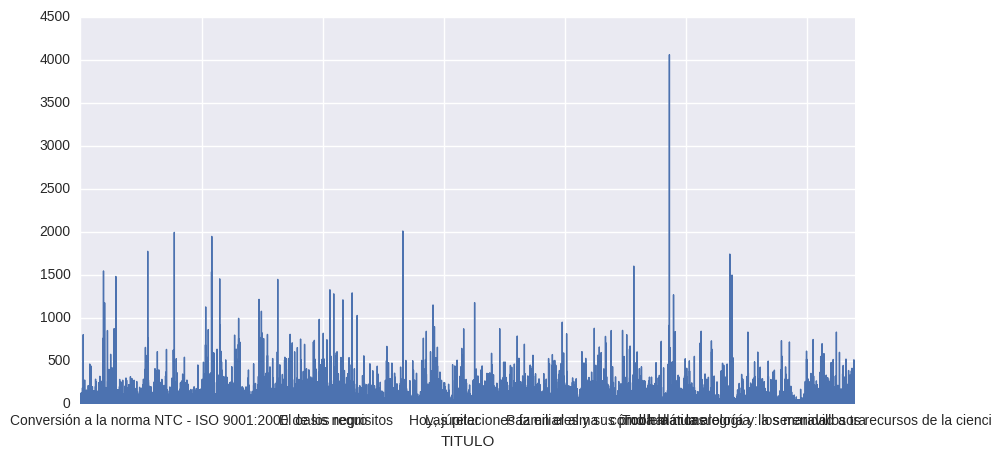

In [27]:
prestamos_titulo.plot(figsize=(10,5))

In [9]:
for x, y in prestamos_df.groupby('TITULO')['SUCURSAL']:
    if y.count() > 1500:
        print(str(x).split()[0],'-', y.count(), 'préstamos')
        print()

Algebra - 1549 préstamos

Biología - 1777 préstamos

Cien - 1997 préstamos

Cuentos - 1539 préstamos

Cuentos - 1950 préstamos

Física - 2013 préstamos

Metodología - 1605 préstamos

Obras - 4060 préstamos

Química - 1745 préstamos

Rayuela - 1501 préstamos



In [16]:
qq=prestamos_df.groupby('TITULO')['AUTOR'].nunique()

In [23]:
qq.ix['Rayuela']

1

In [10]:
prestamos_libro = prestamos_df.groupby('COD_BARRAS_LIBRO')

In [36]:
prestamos_libro = prestamos_df.groupby('TITULO')

In [37]:
prestamos_libro.count().head()

,AUTOR,SUCURSAL,COD_BARRAS_LIBRO,DEWEY,DESC_LOCALIZACION_EJEMPLAR,FECHA_PUB,PAIS_EJEMPLAR,OCUPACION,NIVEL_EDUCACION,AREA_ESTUDIO,SUCURSAL_PRESTAMO,SUCURSAL_DEVOLUCION,SUCURSAL_DEL_LECTOR,COD_BARRAS_LECTOR,CATEGORÍA,FECHA_PRESTAMO,FECHA_REAL_DEVOLUCION,DATE_PRESTAMO,DATE_DEVOLUCION
TITULO,,,,,,,,,,,,,,,,,,,
,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
!Ayombe¡ the heart of Colombia's música vallenata,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
"!Canta, musa! : los episodios más fascinantes de la guerra d",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
!Como los animales¡,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
"!En qué mundo vivimos : infórmate, piensa y actúa",3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [1]:
x={'a':1,'b':2}

In [4]:
x.get('c', 'Unknown')

'Unknown'

In [11]:
d={}
for a, b in prestamos_libro:
    d[a] = b['SUCURSAL'].nunique() + b['SUCURSAL_PRESTAMO'].nunique() + b['SUCURSAL_DEVOLUCION'].nunique()

In [15]:
for k in d:
    if d[k] > 30:
        print(k, d[k])

943037 31
2395411 32
2394481 33
2428349 31
2394956 33
2338857 35
2394480 39
2320740 31
2251475 33
2395410 33
2139273 33
1629616 31
2251870 37
1870870 31
2395409 33
2261959 35
1629615 33
2310695 31
2394479 32
2394478 32
2363039 33
1575292 35
2350269 33
2206686 33


### Distribución del número de préstamos

### Valores medios por cada tres días

### Valores máximos por cada tres días

## Sucursales

In [51]:
sucursales = {
    'ARM': 'Armenia',
    'BLAA': 'Luis Angel Arango',
    'BUE': 'Buenaventura',
    'CAL': 'Cali',
    'CAR': 'Cartagena',
    'CASAGO': 'Casa Gómez Campuzano',
    'CATMAN': 'Catalogación y Mantenimiento de Colecciones',
    'CUC': 'Cúcuta',
    'FLO': 'Florencia',
    'GIR': 'Girardot',
    'HON': 'Honda',
    'IBA': 'Ibagué',
    'IEC': 'Investigaciones Económicas',
    'IPI': 'Ipiales',
    'LET': 'Leticia',
    'MAN': 'Manizales',
    'MED': 'Medellín',
    'MON': 'Montería',
    'NEI': 'Neiva',
    'PAS': 'Pasto',
    'PER': 'Pereira',
    'POP': 'Popayán',
    'QUI': 'Quibdó',
    'RIO': 'Riohacha',
    'SAN': 'San Andrés',
    'SIN': 'Sincelejo',
    'STM': 'Santa Marta',
    'TUN': 'Tunja',
    'VAL': 'Valledupar',
}

### Total préstamos por sucursal

In [18]:
prestamos_sucursal = prestamos_df.groupby('SUCURSAL_PRESTAMO')[['TITULO']].count()

In [19]:
prestamos_sucursal

,TITULO
SUCURSAL_PRESTAMO,
ARM,30545
BAR,15035
BLAA,1530725
BUC,45170
BUE,6510
CAL,34726
CAR,35157
CASAGO,94056
CATMAN,2088


### Total préstamos por sucursal y fecha

In [20]:
prestamos_sucursal_fecha = prestamos_df.groupby(['SUCURSAL_PRESTAMO', 'DATE_PRESTAMO'])['TITULO'].count()
prestamos_sucursal_fecha = prestamos_sucursal_fecha.unstack(level=0).fillna(0)

In [21]:
prestamos_sucursal_fecha.head()

SUCURSAL_PRESTAMO,ARM,BAR,BLAA,BUC,BUE,CAL,CAR,CASAGO,CATMAN,CUC,...,PER,POP,QUI,RIO,SAN,SIN,STM,TUN,VAL,VIL
DATE_PRESTAMO,,,,,,,,,,,,,,,,,,,,,
2012-01-02,0.0,0.0,42.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-03,1.0,0.0,67.0,3.0,0.0,0.0,2.0,3.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,2.0,0.0
2012-01-04,0.0,0.0,105.0,2.0,0.0,0.0,2.0,5.0,0.0,1.0,...,4.0,6.0,0.0,1.0,0.0,0.0,4.0,7.0,5.0,1.0
2012-01-05,0.0,0.0,125.0,4.0,0.0,5.0,4.0,17.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,1.0,17.0,5.0,0.0
2012-01-06,0.0,0.0,193.0,14.0,0.0,4.0,3.0,10.0,0.0,1.0,...,9.0,0.0,0.0,0.0,2.0,4.0,1.0,23.0,7.0,2.0


### Ejemplo comparación dos sucursales

### Número de préstamos por sucursal y fecha

## Topics

In [50]:
topics = {}
with open('dewey.txt') as f:
    for line in f:
        chunks = line.strip().split()
        dewey = chunks[0]
        topic = ' '.join(chunks[1:])
        topics[dewey] = topic

### Total préstamos por topic

In [27]:
all_prestamos_topic = prestamos_df.groupby('DEWEY')[['TITULO']].count()

#### Incorrect topic

In [28]:
all_prestamos_topic.ix[('000' > all_prestamos_topic.index) | (all_prestamos_topic.index > '999')].sum()

TITULO    131564
dtype: int64

#### Correct topic

In [29]:
all_prestamos_topic.ix[('000' <= all_prestamos_topic.index) & (all_prestamos_topic.index <= '999')].sum()

TITULO    2922796
dtype: int64

In [30]:
prestamos_topic_ok_df = prestamos_df[('000' <= prestamos_df['DEWEY']) & (prestamos_df['DEWEY'] <= '999')]

In [31]:
prestamos_topic = prestamos_topic_ok_df.groupby('DEWEY')[['TITULO']].count()

In [32]:
prestamos_topic.head()

,TITULO
DEWEY,
000,294
001,14396
002,1033
003,1774
004,3667


### Total préstamos por topic y fecha

In [33]:
prestamos_topic_fecha = prestamos_topic_ok_df.groupby(['DEWEY', 'DATE_PRESTAMO'])['TITULO'].count()
prestamos_topic_fecha = prestamos_topic_fecha.unstack(level=0).fillna(0)

In [34]:
prestamos_topic_fecha.head()

DEWEY,000,001,002,003,004,005,006,007,008,009,...,989,990,991,993,994,995,996,997,998,999
DATE_PRESTAMO,,,,,,,,,,,,,,,,,,,,,
2012-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-03,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-04,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-05,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-06,0.0,3.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Ejemplo comparación dos topics

### Top topics

In [246]:
indices = prestamos_topic[prestamos_topic['TITULO'] > 40000].index

In [247]:
indices

Index(['301', '372', '658', '808', '813', '823', '833', '843', '861', '863',
       '986'],
      dtype='object', name='DEWEY')

In [248]:
prestamos_top_topics_df = prestamos_df[prestamos_df['DEWEY'].map(lambda x: x in indices)]

In [249]:
prestamos_top_topics_df.head()

,TITULO,AUTOR,SUCURSAL,COD_BARRAS_LIBRO,DEWEY,DESC_LOCALIZACION_EJEMPLAR,FECHA_PUB,PAIS_EJEMPLAR,OCUPACION,NIVEL_EDUCACION,AREA_ESTUDIO,SUCURSAL_PRESTAMO,SUCURSAL_DEVOLUCION,SUCURSAL_DEL_LECTOR,COD_BARRAS_LECTOR,CATEGORÍA,FECHA_PRESTAMO,FECHA_REAL_DEVOLUCION,DATE_PRESTAMO,DATE_DEVOLUCION
0,Un bicho extraño,"Daporta, Mon.",ARM,2298061,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88429527,CTA,22/01/2015,04/02/2015,2015-02-04,2015-01-22
1,Un bicho extraño,"Daporta, Mon.",ARM,2298061,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88416381,CTA,31/03/2015,07/04/2015,2015-04-07,2015-03-31
4,La fantástica leyenda de: la princesa y el dragón,"Alins, Sonia.",ARM,2288896,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88429529,CTA,21/01/2015,28/01/2015,2015-01-28,2015-01-21
5,La fantástica leyenda de: la princesa y el dragón,"Alins, Sonia.",ARM,2288896,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88429422,CTA,11/02/2015,17/02/2015,2015-02-17,2015-02-11
6,La fantástica leyenda de: la princesa y el dragón,"Alins, Sonia.",ARM,2288896,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88388144,CTA,05/11/2015,03/12/2015,2015-12-03,2015-11-05


### Número de préstamos por top topic y fecha

## Año publicación

### Número de préstamos por año de publicación

In [154]:
prestamos_pub = prestamos_df.groupby('FECHA_PUB')['TITULO'].count()

## Usuarios

1.       CTA: categoría para niños y jóvenes hasta bachillerato
2.       CTI: categoría infantil, hasta doce años y solo es para Bogotá (blaa –biblioteca Luis Ángel Arango)
3.       CTB: público general (solo permite préstamo de libros)
4.       CTC: público en general (permite préstamo de libros y material audiovisual)
5.       CTF: categoría familiar, pueden acceder a los beneficios hasta tres personas del grupo familiar que se asocia
6.       CE1, CE2, CE2: categorías empresariales (solo para instituciones)
7.       CIS: categoría Inclusión Social
8.       CTU: categoría Universitaria
9.       VIP: Investigadores, préstamo de 30 materiales (libros y material audiovisual)

In [236]:
categorias_usuario = {
    'CTA': 'categoría para niños y jóvenes hasta bachillerato',
    'CTI': 'categoría infantil, hasta doce años y solo es para Bogotá (blaa –biblioteca Luis Ángel Arango)',
    'CTB': 'público general (solo permite préstamo de libros)',
    'CTC': 'público en general (permite préstamo de libros y material audiovisual)',
    'CTF': 'categoría familiar, pueden acceder a los beneficios hasta tres personas del grupo familiar que se asocia',
    'CE1': 'categorías empresariales (solo para instituciones) 1',
    'CE2': 'categorías empresariales (solo para instituciones) 2',
    'CE3': 'categorías empresariales (solo para instituciones) 3',
    'CIS': 'categoría Inclusión Social',
    'CTU': 'categoría Universitaria',
    'VIP': 'Investigadores, préstamo de 30 materiales (libros y material audiovisual)',
}

In [268]:
prestamos_usuario = prestamos_df.groupby('CATEGORÍA')[['TITULO']].count()

In [269]:
prestamos_usuario

,TITULO
CATEGORÍA,
CAN,8
CE1,80702
CE2,17398
CE3,1
CEM,106300
CIN,53376
CIP,3958
CIS,64114
CIV,11069


### Número de préstamos por usuario y fecha

### Ejemplo comparación dos usuarios

In [271]:
prestamos_usuario_fecha = prestamos_df.groupby(['CATEGORÍA', 'DATE_PRESTAMO'])['TITULO'].count()
prestamos_usuario_fecha = prestamos_usuario_fecha.unstack(level=0).fillna(0)

### Top días por año

In [6]:
for x, y in prestamos_df.groupby('DATE_PRESTAMO')['TITULO']:
    if y.count() > 3500:
        print(str(x).split()[0],'-', y.count(), 'préstamos')
        print()

2012-04-02 - 3748 préstamos

2012-04-04 - 3664 préstamos

2012-04-09 - 4635 préstamos

2013-04-01 - 4686 préstamos

2014-04-21 - 4283 préstamos

2015-04-06 - 3615 préstamos

2016-03-22 - 3854 préstamos

2016-03-28 - 4081 préstamos



In [277]:
top_dias = prestamos_df[prestamos_df['DATE_PRESTAMO'].map(lambda x: x in [
            pd.tslib.Timestamp('2012-04-09'),
            pd.tslib.Timestamp('2013-04-01'),
            pd.tslib.Timestamp('2014-04-21'),
            pd.tslib.Timestamp('2015-04-06'),
            pd.tslib.Timestamp('2016-03-28')])]

## Título

In [ ]:
# qq=prestamos_df.groupby('TITULO')['AUTOR'].count()

KeyboardInterrupt: 

In [68]:
prestamos_df.groupby(prestamos_df.DATE_PRESTAMO)['TITULO'].count()['2012-04-07']

21

In [59]:
for x, y in prestamos_df.groupby(prestamos_df.DATE_DEVOLUCION)['TITULO']:
    if y.count() > 3500:
        print(x)
        print(y.count())
        print()

2012-04-02 00:00:00
3748

2012-04-04 00:00:00
3664

2012-04-09 00:00:00
4635

2013-04-01 00:00:00
4686

2014-04-21 00:00:00
4283

2015-04-06 00:00:00
3615

2016-03-22 00:00:00
3854

2016-03-28 00:00:00
4081



In [78]:
df = prestamos_df.groupby([prestamos_df.SUCURSAL_PRESTAMO, prestamos_df.DATE_PRESTAMO])['TITULO'].count()

## Fechas

In [2]:
dates = pd.date_range('2012-1-1', '2016-12-31', freq='MS')

In [3]:
dates

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
      

In [4]:
# ranges = [(x, y - timedelta(1)) for x, y in zip(dates, dates[1:])]

In [5]:
# ranges

## Topics

In [57]:
# topics

## Sucursales

In [56]:
# %%time

# sucursales = {}
# for filename in os.listdir('prestamos_csv'):
#     if filename.endswith('.csv'):
#         with open('prestamos_csv/' + filename) as f:
#             reader = csv.reader(
#                 f,
#                 delimiter=',',
#                 quotechar='"'
#             )
#             next(reader)
#             for row in reader:
#                 sucursales[row[3]] = row[4]